In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
new_df=pd.read_csv("kyphosis.csv")
new_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
new_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
np.percentile(new_df['Age'],90) # we chake the 90% of age in the data set

158.0

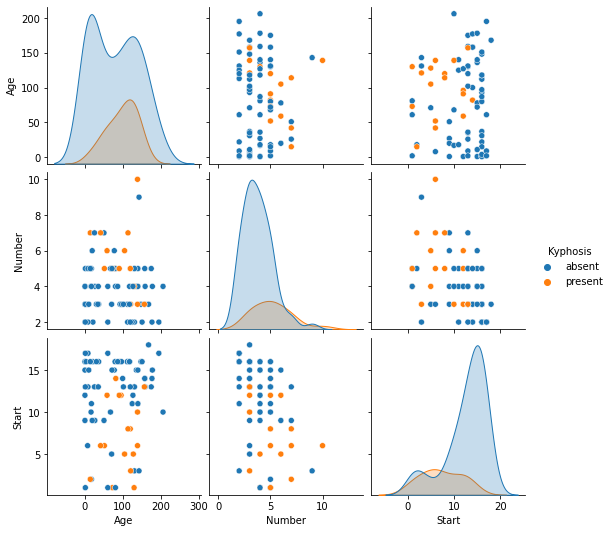

In [6]:
sns.pairplot(new_df,hue='Kyphosis')
plt.show()

<AxesSubplot:>

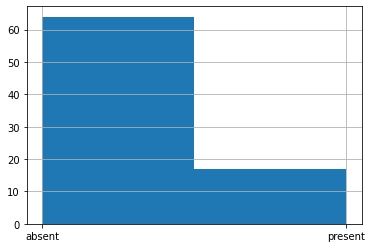

In [7]:
# data imbalence 
new_df['Kyphosis'].hist(bins=2)


# EDA

In [7]:
# split the data dependend and independ data t ype
x=new_df.drop('Kyphosis',axis=1)
y=new_df['Kyphosis']
y
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [8]:
# first find model cass attribue is an one othe r calss attribue
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=1)
X_train

,Age,Number,Start
61,114,7,8
73,206,4,10
67,159,4,13
26,8,3,6
79,42,7,6
65,17,4,10
44,97,3,16
42,143,9,3
60,130,4,1
80,36,4,13


# Tree Decision

In [23]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion = 'gini',splitter='best',max_depth=4,max_features='auto',random_state=0)
t=model.fit(X_train,y_train)

# preiciction and Evalueation

In [24]:
y_pred=model.predict(X_test)
y_pred

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'present', 'present',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
# first we find confusion of the metrics
cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix,accuracy_score(y_test,y_pred)*100)


[[16  3]
 [ 4  2]] 72.0


In [13]:
# we find classifiction report means we no that that find yes/no prameter porbelm it called cassifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



# visulation

In [14]:
new_df.std()


C:\Users\ANKUSH~1\AppData\Local\Temp/ipykernel_1628/2537676404.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.std()


Age       58.104251
Number     1.619423
Start      4.883962
dtype: float64

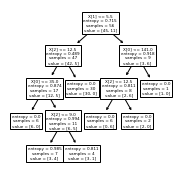

In [15]:
from sklearn import tree
plt.figure(figsize=(3,3))
tree.plot_tree(t)
plt.show()

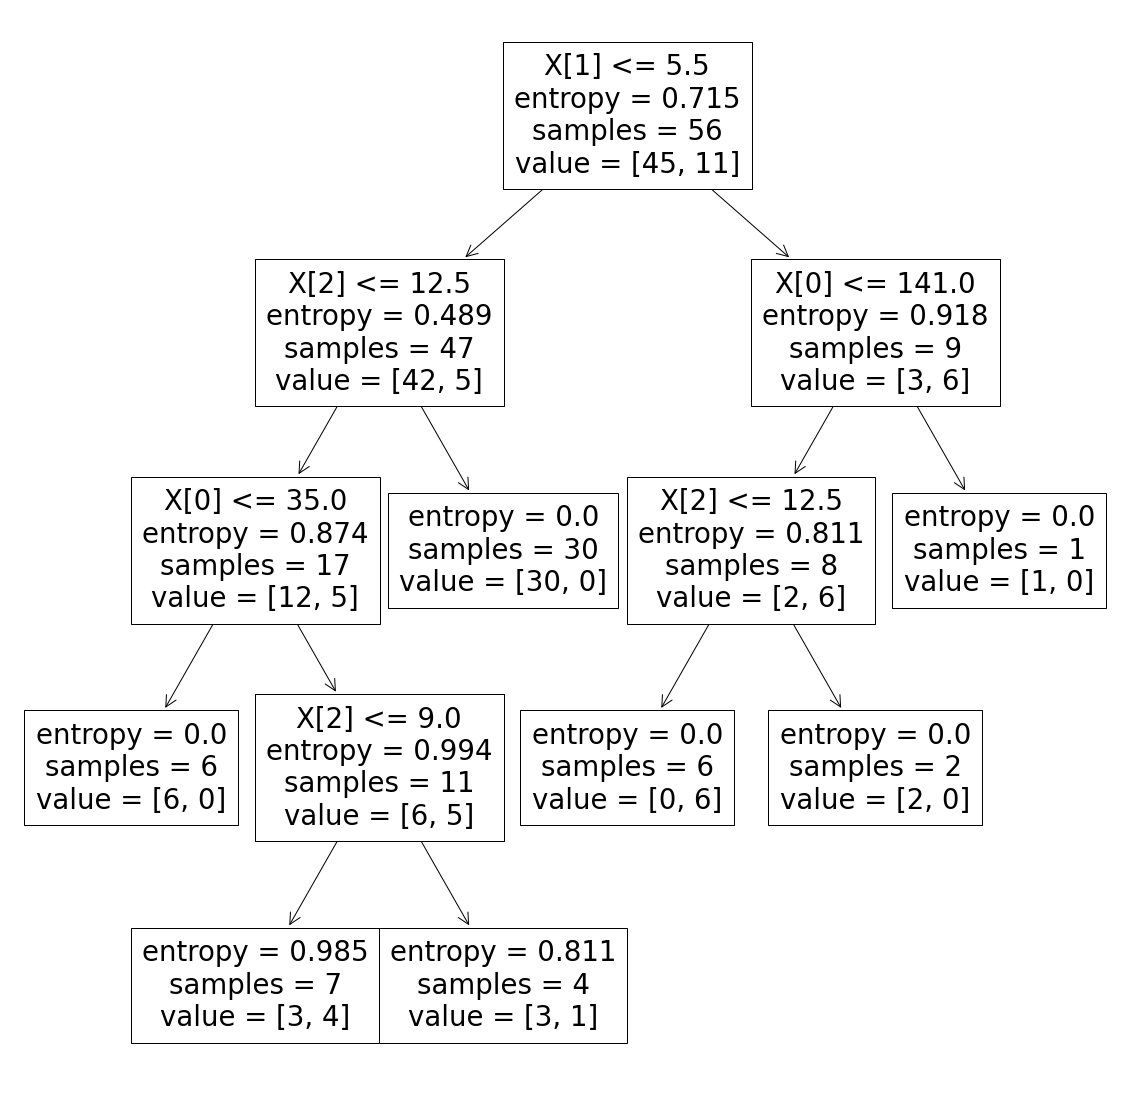

In [16]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(t)
plt.show()

# RandomForestClassifier


In [26]:
from sklearn.ensemble import RandomForestClassifier
logrand=RandomForestClassifier(n_estimators=120)
logrand.fit(X_train,y_train)
Y_pred=logrand.predict(X_test)
Y_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'present', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [27]:
print(accuracy_score(y_test,Y_pred)*100)

72.0


In [28]:
cnf_matrix1=confusion_matrix(y_test,Y_pred)
cnf_matrix

array([[16,  3],
       [ 4,  2]], dtype=int64)

In [ ]:
# now we are visualtion this cnf_matrix by hellp of sns.heatmap
class_name=[0,1]
fig,ax=plt.subplots()
ticks_value=np.arange(len(class_name))
plt.xticks(ticks_value,class_name)
plt.yticks(ticks_value,class_name)
sns.heatmap(pd.DataFrame(cnf_matrix),cbar=True,square=True,annot=True,cmap='Blues',fmt='g')
ax.xaxis.set_label_position('top')
plt.title('confusion_matrix')
plt.legend(loc=2)
plt.xlabel('y_test')
plt.ylabel("Y_pred")
plt.show()

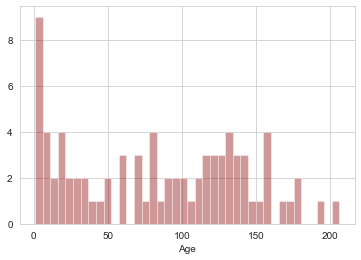

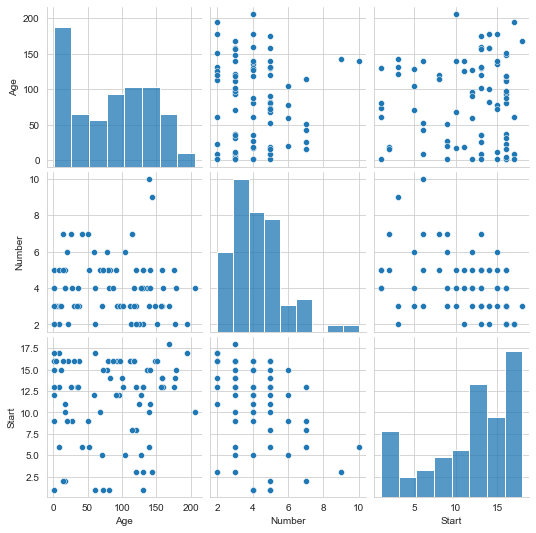

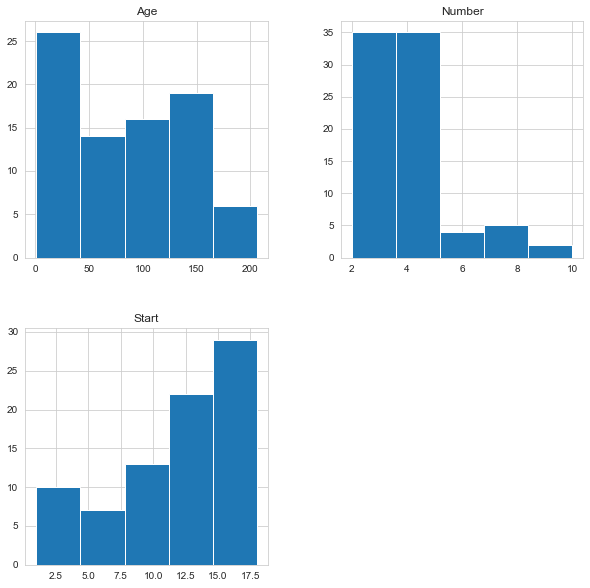

In [31]:
sns.distplot(new_df['Age'].dropna(),kde=False,color='darkred',bins=40)
sns.pairplot(new_df)
new_df.hist(bins=5, figsize=(10,10))

sns.set_style('whitegrid')
sns.countplot(x='Age',data=new_df)
plt.show()

In [ ]:
dir(sns)

In [1]:
#classification_report(y_test,Y_pred)
print(classification_report(y_test,y_pred))

NameError: name 'classification_report' is not defined